# Antonio Esteves

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

* Realize uma análise exploratória nos dados, identificando e explorando (10 pts.): 
  * **(i)** correlações entre as variáveis - **DONE** 
  * **(ii)** distribuição das variáveis - **DONE** 
  * **(iii)** valores ausentes - **DONE** 
* Usando todas as variáveis disponíveis, tune (usando validação cruzada): 
  * **(i)** um modelo de regressão Ridge, 
  * **(ii)** um modelo de regressão Lasso,
  * **(iii)** um modelo KNN. 
  
  Para os modelos de regressão linear, o parâmetro a ser tunado é o lambda (penalização dos coeficientes) e no KNN o número (K) de vizinhos. Compare os três modelos em termos do erro RMSE de validação cruzada. (30 pts.)


* Quais as variáveis mais importantes segundo o modelo de regressão Ridge e Lasso?  Variáveis foram descartadas pelo Lasso? Quais? (10 pts.)
* Re-treine o melhor modelo (usando os melhores valores de parâmetros encontrados em todos os dados, sem usar validação cruzada). Use esse último modelo treinado para prever os dados de teste disponíveis no challenge que criamos na plataforma Kaggle (30 pts.)

### Ideias para melhorar os resultados:

* Tente criar novas variáveis a partir das variáveis existentes. 
* Tente usar transformações (e.g. log) nas variáveis que apresentarem viés.
* Tente normalizar as variáveis.
* Experimente estratégias diferentes para lidar com dados ausentes (NAs).
* Use outros métodos de regressão. Por exemplo, SVR, Árvores de Regressão e Florestas Aleatórias.

# Dependências

In [1]:
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Declarando Funções

In [22]:
def predict_plot(y, y_pred, label_set, label_var, color):
    plt.figure(figsize=(15, 10))
    plt.title('Estimativa de predição sob os dados de ' + label_set + ' - '+ label_var, fontsize=20)
    plt.plot(y, label='Actual', color=color[0])
    plt.plot(y_pred, label='Predicted', color=color[1])
    plt.xlabel('n-ésima amostra')
    plt.ylabel('CRA')
    plt.grid()
    plt.legend()

# Carregando Dados

In [23]:
cartola = pd.read_csv('./data/cartola_2014.csv')

In [24]:
cartola.head()

,atleta_id,rodada,clube_id,participou,posicao_id,jogos_num,pontos_num,media_num,preco_num,variacao_num,...,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
0,37958,1,262.0,1,1.0,1,8.0,8.0,19.69,1.69,...,0,0,0,0,0,0,1,1,0,0
1,68873,1,262.0,0,1.0,0,0.0,0.0,4.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,37701,1,262.0,1,2.0,1,0.4,0.4,16.97,-5.03,...,0,0,1,0,1,0,1,0,0,0
3,71602,1,262.0,0,2.0,0,0.0,0.0,3.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,37684,1,262.0,1,3.0,1,9.1,9.1,10.68,5.68,...,0,2,1,0,0,0,1,0,0,0


# Sumário dos Dados

Text(0.5, 1.0, 'Distribuição de Notas')

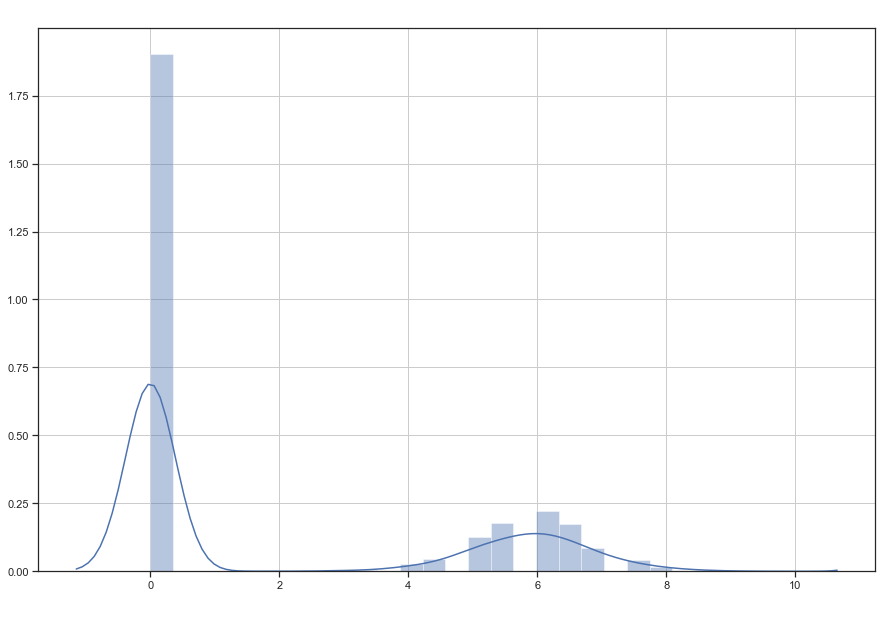

In [25]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.grid()
plt.xlabel('Nota', fontsize=18, color='white')
sns.distplot(cartola['nota'],hist_kws=dict(edgecolor="white")).set_title('Distribuição de Notas', color='white', fontsize=20, fontweight="bold")

In [26]:
cartola.shape

(29184, 34)

In [27]:
cartola.describe()

,atleta_id,rodada,clube_id,participou,posicao_id,jogos_num,pontos_num,media_num,preco_num,variacao_num,...,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
count,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,...,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000
mean,68725.887061,18.488247,150.176467,0.362390,1.886033,6.363487,0.977100,1.588483,5.599905,-0.000048,...,0.000617,0.310958,0.397272,0.000788,0.053008,0.002193,0.043483,0.034265,0.000411,0.027104
std,16655.955349,10.378876,141.539948,0.480699,2.029297,7.484913,2.768579,2.056103,4.704520,0.736660,...,0.024828,0.832903,0.934368,0.028063,0.224360,0.046779,0.204113,0.291499,0.020274,0.238900
min,36443.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-12.000000,0.760000,-7.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,60784.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72491.000000,18.000000,263.000000,0.000000,1.000000,3.000000,0.000000,0.970000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82463.000000,27.000000,284.000000,1.000000,4.000000,10.000000,0.300000,2.880000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89898.000000,36.000000,316.000000,1.000000,6.000000,36.000000,31.900000,22.100000,29.610000,14.800000,...,1.000000,9.000000,10.000000,1.000000,2.000000,1.000000,1.000000,7.000000,1.000000,6.000000


In [28]:
cartola.isnull().any()

atleta_id       False
rodada          False
clube_id        False
participou      False
posicao_id      False
jogos_num       False
pontos_num      False
media_num       False
preco_num       False
variacao_num    False
partida_id      False
mando           False
titular         False
substituido     False
tempo_jogado    False
nota            False
FS              False
PE              False
A               False
FT              False
FD              False
FF              False
G               False
I               False
PP              False
RB              False
FC              False
GC              False
CA              False
CV              False
SG              False
DD              False
DP              False
GS              False
dtype: bool

# Análise dos Dados

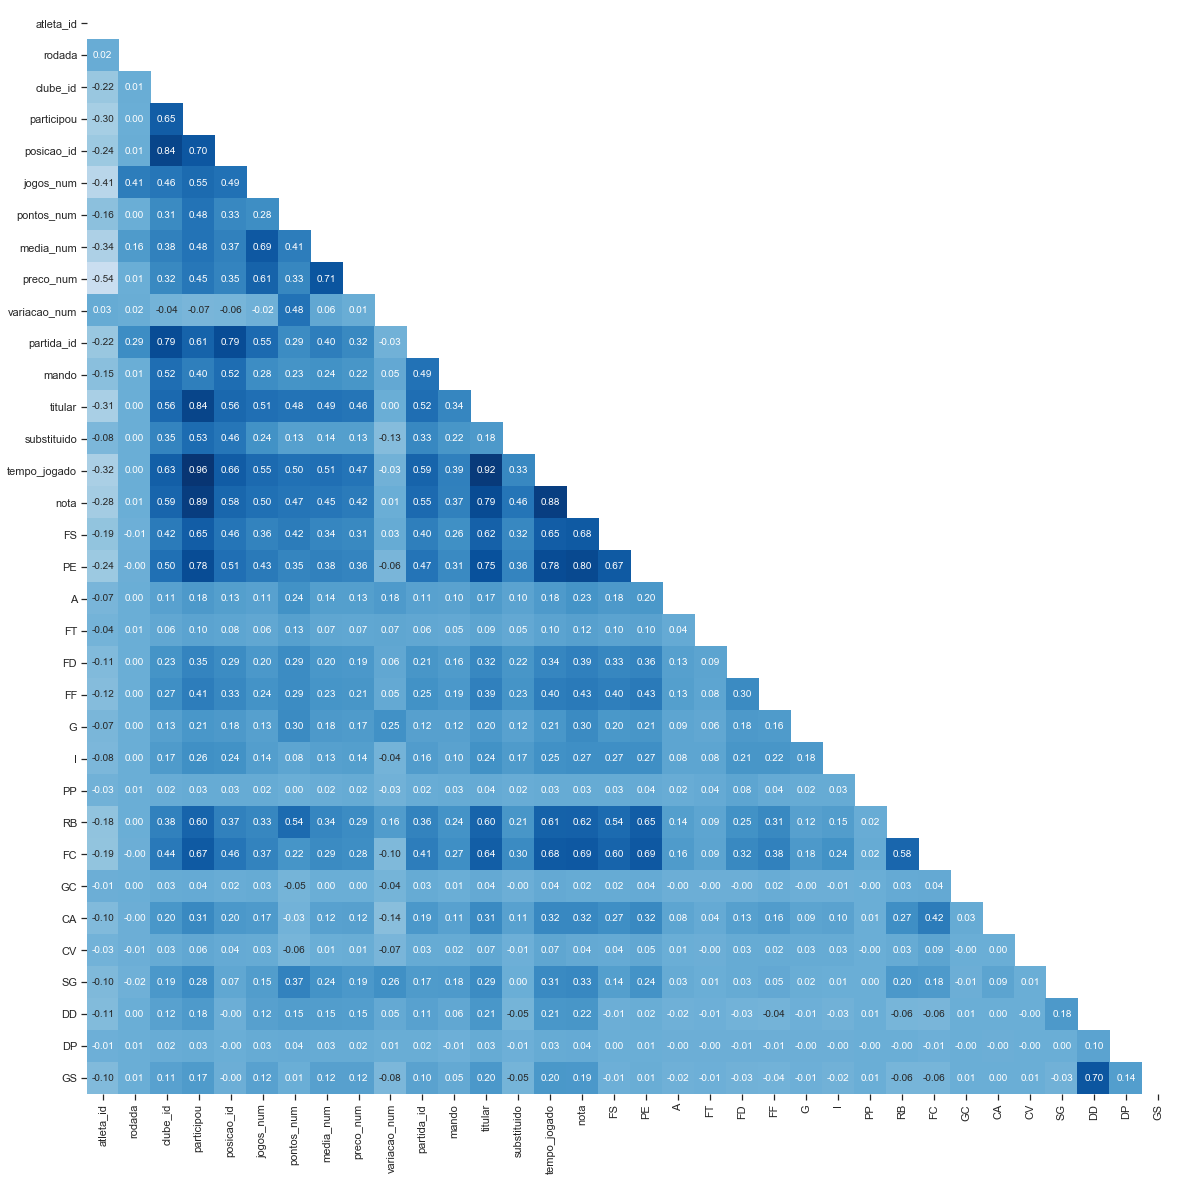

In [29]:
corr = cartola.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)
sns.heatmap(corr, ax=ax, annot=True,  mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

Plotando a matrix de correlação de uma forma mais eficiente podemos avaliar as altas e baixas correlações entre todas as variáveis.

In [30]:
corr.style.background_gradient().set_precision(2).set_properties(**{'font-size': '8pt'})

Se observamos a variável `tempo_jogado` apresenta alta correlação com as variáveis `participou` (0.95) e `titular` (0.92). O mesmo acontece para as variáveis `clube_id` ,`posicao_id` e `partida_id`. Em termos práticos alguns algoritmos lidam melhor quando as variáveis não apresentam alta correlação entre elas. As variáveis citadas anteriormente foram então excluídas devido a sua alta correlação, tornando o nosso futuro modelo menos instável.

Abaixo podemos ter uma visão das variáveis altamente correlacionadas com a variável `tempo_jogado`.

In [48]:
# corr['tempo_jogado'].sort_values(ascending=False)

Abaixo podemos ter uma visão das variáveis melhor correlacionadas com a nossa variável alvo, `nota`.

In [49]:
# corr['nota'].sort_values(ascending=False)

Por fim extraimos do conjunto de dados as variáveis que apresentam uma correlação maior ou igula a 0.5 com a variável alvo, são elas: `PE`, `FC`, `FS`, `RB`

In [50]:
# better_corr = cartola[['nota','PE','FC','FS','RB']]
# sns.pairplot(better_corr, plot_kws = {'alpha': 0.5})

# Criação dos Modelos

## Aplicando a Validação Cruzada

In [97]:
X = cartola.drop(['nota'],axis=1)
y = cartola[['nota']]

kf = KFold(n_splits=10, random_state=42, shuffle=False)
    
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26266, 33) (26266, 1)
(2918, 33) (2918, 1)


## Normalizando os Dados

In [111]:
norm = StandardScaler()
norm = norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Modelo de Regressão Ridge

A regressão ridge se propõe a evitar o overfitting adicionando um custo ao RSS (dos mínimos quadrados) que depende da norma L2 dos coeficientes  ‖𝑤‖  (ou seja da magnitude dos coeficientes). O resultado é a penalização de ajustes com coeficientes muito grandes. A força dessa penalidade é controlada por um parâmetro lambda (aqui chamado "L2_penalty").



A regressão Ridge é um método de regularização do modelo que tem como principal objetivo suavizar atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo, também conhecido como multicolinearidade. Com isso com a retirada de determinados atributos do modelo, o mesmo converge para um resultado muito mais estável em que com a redução desses atributos, a redução em termos de acurácia do modelo se mantêm inalterada. O mecanismo algoritmico que faz isso é através de um mecanismo de penalização que coloca um viés e que vai reduzindo os valores os betas até não zero. Com isso os atributos que contribuem menos para o poder preditivo do modelo são levados para a irrelevância usando esse mecanismo de penalização do viés.

In [112]:
def ridge_regression_model(X,Y, l2_penalty):
    model = Ridge(alpha=l2_penalty)
    model.fit(X,Y)
    return model

In [113]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train_norm,y_train,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

In [114]:
l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty)).mean() for l2_penalty in l2_penalties]
cv_ridge = pd.Series(cv_ridge,index=l2_penalties)
cv_ridge.head()

0.001    0.842357
0.010    0.842357
0.100    0.842356
0.300    0.842355
0.500    0.842354
dtype: float64

Text(83.875, 0.5, 'RMSE')

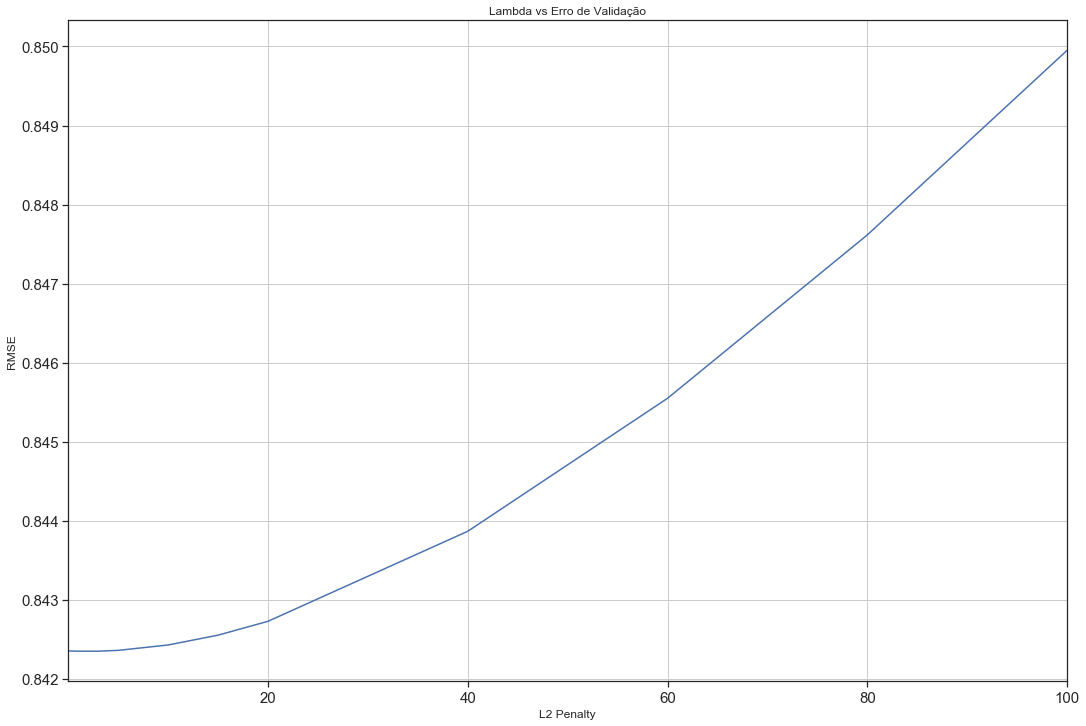

In [115]:
plt.figure(figsize=(15,10))
cv_ridge.plot(title="Lambda vs Erro de Validação",fontsize=15)
plt.tight_layout()
plt.grid()
plt.xlabel("L2 Penalty")
plt.ylabel("RMSE")

In [116]:
best_l2_penalty=cv_ridge.values.argmin()
best_rmse = cv_ridge.min()

# melhor valor de (alpha,rmse) encontrado
print (best_l2_penalty, best_rmse) 

5 0.8423528931857398


In [117]:
ridge_model = ridge_regression_model(X_test_norm,y_test,l2_penalty=best_l2_penalty)

ridge_train_score = ridge_model.score(X_train_norm,y_train)
ridge_test_score = ridge_model.score(X_test_norm, y_test)

# print ("Ridge Model Coeficients:", ridge_model.coef_)
print ("Ridge Regression train score:", ridge_train_score)
print ("Ridge Regression test score:", ridge_test_score)

Ridge Regression train score: 0.8681843238160855
Ridge Regression test score: 0.9119558248003663


In [118]:
y_pred = ridge_model.predict(X_test_norm)

In [119]:
df_ridge_results = pd.DataFrame({'Actual': y_test[y_test.columns[0]], 'Predicted': y_pred.flatten()})
df_ridge_results.head(10)

,Actual,Predicted
26266,6.0,6.797018
26267,4.5,5.927463
26268,7.5,5.842441
26269,5.5,5.665802
26270,8.0,8.494604
26271,0.0,3.507857
26272,8.0,7.667006
26273,0.0,-0.036348
26274,0.0,-0.003153
26275,5.5,4.879516


## Modelo de Regressão Lasso

A regressão Lasso, ao mesmo tempo, encolhe a magnitude dos coeficientes para evitar o overfitting e realiza implicitamente seleção de característcas igualando alguns atributos a zero (para lambdas, aqui chamados "L1_penalty", suficientemente grandes). Em particular, o Lasso adiciona ao RSS o custo $\|w\|$.

A regresão Lasso, assim como a Ridge, tem o mesmo mecanismo de penalização dos coeficientes com um alto grau de correlação entre si, mas que usa o mecanismo de penalizar os coeficientes de acordo com o seu valor absoluto (soma dos valores dos estimadores) usando o mecanismo de minimizar o erro quadrático. Isso é feito através da penalização do coeficiente até que o mesmo convirja para zero; o que naturalmente vai eliminar o atributo e reduzir a dimensionalidade do modelo.

In [120]:
def lasso_regression_model(X, Y, l1_penalty):
    model = Lasso(alpha=l1_penalty, max_iter=10000)
    model.fit(X,Y)
    return model

In [121]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train_norm,y_train,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

In [128]:
l1_penalties = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10]
cv_lasso = [rmse_cv(Lasso(alpha=l1_penalty)).mean() for l1_penalty in l1_penalties]
cv_lasso = pd.Series(cv_lasso,index=l1_penalties)
cv_lasso.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1602.9761391159536, tolerance: 18.989350869325907
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962.5153968915583, tolerance: 18.9722088370912
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722.6312281292667, tolerance: 19.091482289860167
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model

0.00001    0.842351
0.00010    0.842308
0.00100    0.842653
0.01000    0.882452
0.10000    1.067516
dtype: float64

Text(92.25, 0.5, 'RMSE')

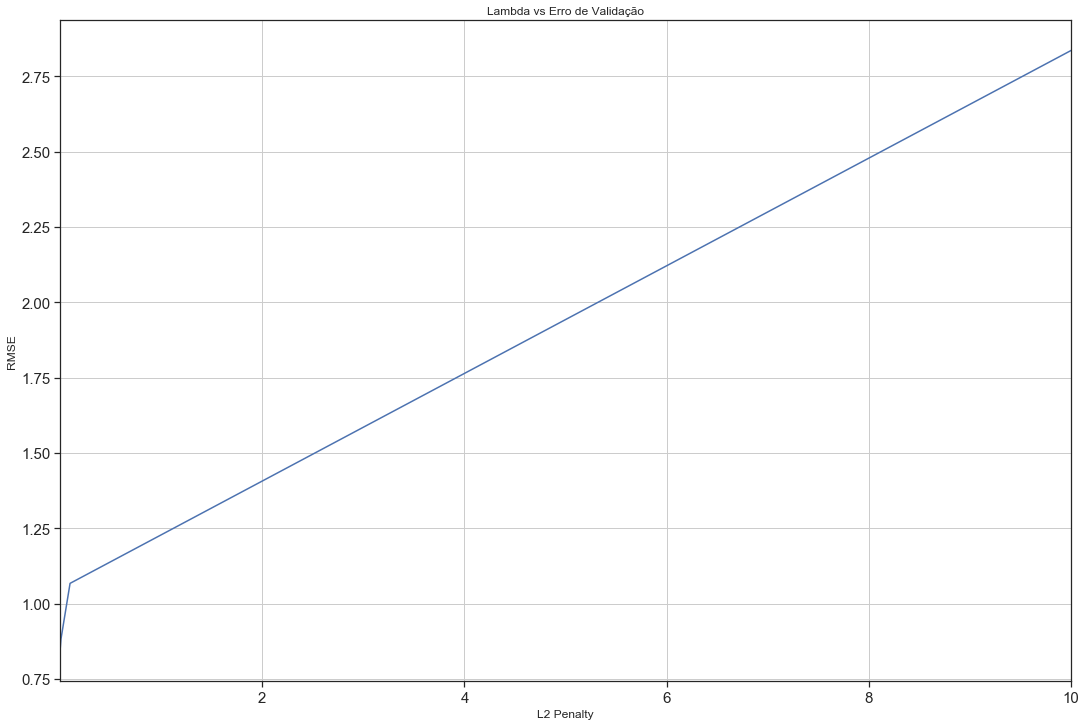

In [130]:
plt.figure(figsize=(15,10))
cv_lasso.plot(title="Lambda vs Erro de Validação",fontsize=15)
plt.tight_layout()
plt.grid()
plt.xlabel("L2 Penalty")
plt.ylabel("RMSE")

In [131]:
best_l1_penalty=cv_lasso.values.argmin()
best_rmse = cv_lasso.min()

# melhor valor de (alpha,rmse) encontrado
print (best_l1_penalty, best_rmse) 

1 0.8423082127210719


In [133]:
lasso_model = lasso_regression_model(X_test_norm,y_test,l1_penalty=best_l1_penalty)

lasso_train_score = lasso_model.score(X_train_norm,y_train)
lasso_test_score = lasso_model.score(X_test_norm, y_test)

print ("Lasso Model Coeficients:", lasso_model.coef_)
print ("Lasso Regression train score:", ridge_train_score)
print ("Lasso Regression test score:", ridge_test_score)

Lasso Model Coeficients: [-0.          0.          0.          1.09493979  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.42326803  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Lasso Regression train score: 0.8681843238160855
Lasso Regression test score: 0.9119558248003663


In [134]:
names = X.columns

for c, att in zip(lasso_model.coef_, names):
    print('{}: {}'.format(att, round(c, 3)))

atleta_id: -0.0
rodada: 0.0
clube_id: 0.0
participou: 1.095
posicao_id: 0.0
jogos_num: 0.0
pontos_num: 0.0
media_num: 0.0
preco_num: 0.0
variacao_num: 0.0
partida_id: 0.0
mando: 0.0
titular: 0.0
substituido: 0.0
tempo_jogado: 0.423
FS: 0.0
PE: 0.0
A: 0.0
FT: 0.0
FD: 0.0
FF: 0.0
G: 0.0
I: 0.0
PP: 0.0
RB: 0.0
FC: 0.0
GC: 0.0
CA: 0.0
CV: 0.0
SG: 0.0
DD: 0.0
DP: 0.0
GS: 0.0


## Modelo de Regressão KNN

## Análise do RMSE

## Let us have a look at the error rate for different k values

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Prediction on test dataset

In [ ]:
#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

* Random Forest
* Xgboost
* Decision Tree
* Gradient Boosted Tree
* Rede Elástica